In [48]:
# Import necessary libraries:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings to reduce unnecessary output:
warnings.filterwarnings("ignore")

import initial_exploration as expl

In [49]:
# Load datasets:
cash_requests = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [118]:
cash_requests.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [51]:
expl.check(cash_requests)

Number of columns: 9 amd rows: 2443651

Data types:
uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

Unique values count:
uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

This columns apear to be categroical:
 Index(['isBestSeller'], dtype='object')

Unique value count for categorical columns:
isBestSeller
False    2435671
True        7980
Name: count, dtype: int64

Count of null values:
uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller      

In [52]:
print(f"{cash_requests["category"].value_counts()}\n")

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64



# Part 1: Understanding Product Categories

### Frequency Tables

In [53]:
def freq(data_frame, col_):
    '''This function generate frequency table for category columns'''
    
    # Generate freuqncy table
    frequency_table = data_frame[col_].value_counts()
    proportion_table = data_frame[col_].value_counts(normalize = True).round(3)

    df = pd.concat([frequency_table, proportion_table], axis=1)
    df.columns = ["absolute_frequency", "relative_frequency"]

    total_absolute = frequency_table.sum()
    total_relative = proportion_table.sum()

    total_row = pd.DataFrame({
        'absolute_frequency': [total_absolute],
        'relative_frequency': [round(total_relative, 1)]
    }, index=['Total'])
    
    df_f = pd.concat([df,total_row])
    
    return (df_f, df)

freq_table_total, freq_table = freq(cash_requests, "category")

In [54]:
# Frequency table for the product category
freq_table_total

,absolute_frequency,relative_frequency
Sports & Outdoors,836265,0.342
Beauty,19312,0.008
"Handmade Clothing, Shoes & Accessories",19229,0.008
Bath & Body,19092,0.008
Birthday Gifts,18978,0.008
...,...,...
Alexa Built-In Devices,107,0.000
Plugs,107,0.000
Smart Home Security & Lighting,104,0.000
Smart Speakers,54,0.000


In [55]:
# top 5 most listed product categories
freq_table_total.head(5)

,absolute_frequency,relative_frequency
Sports & Outdoors,836265,0.342
Beauty,19312,0.008
"Handmade Clothing, Shoes & Accessories",19229,0.008
Bath & Body,19092,0.008
Birthday Gifts,18978,0.008


### Visualizations

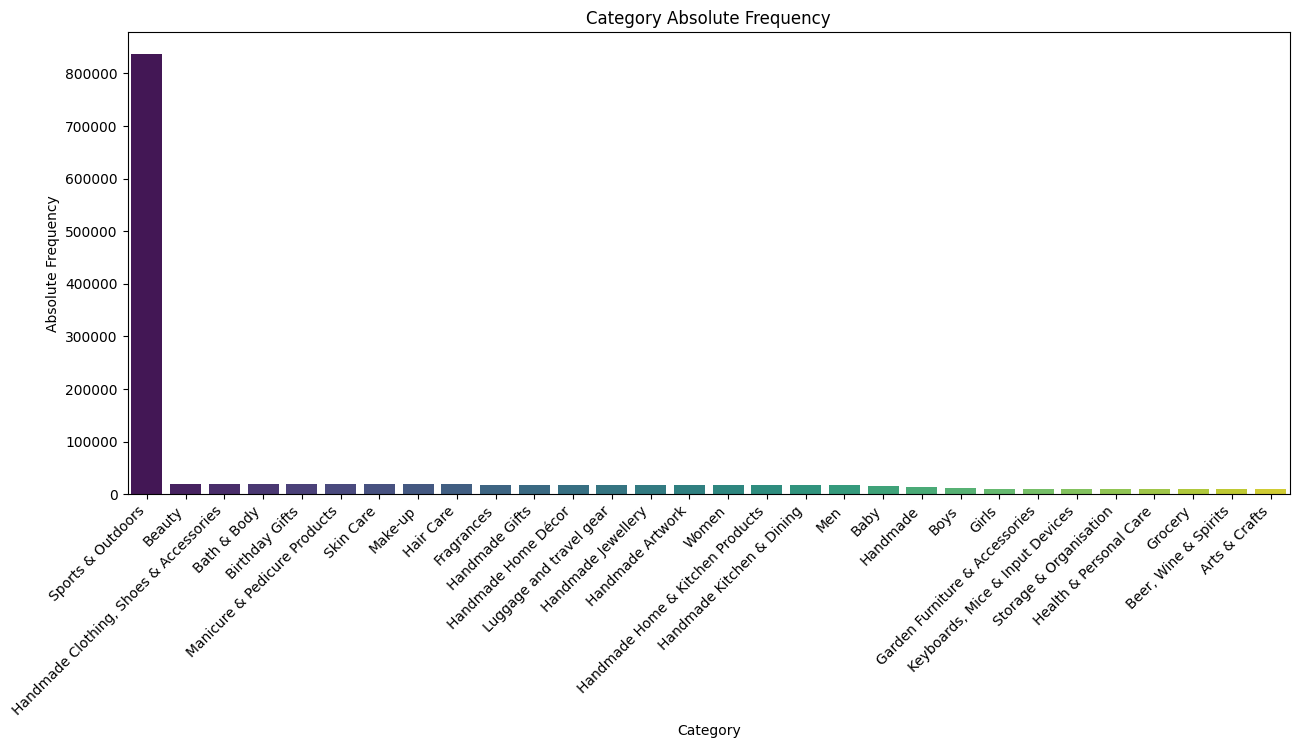

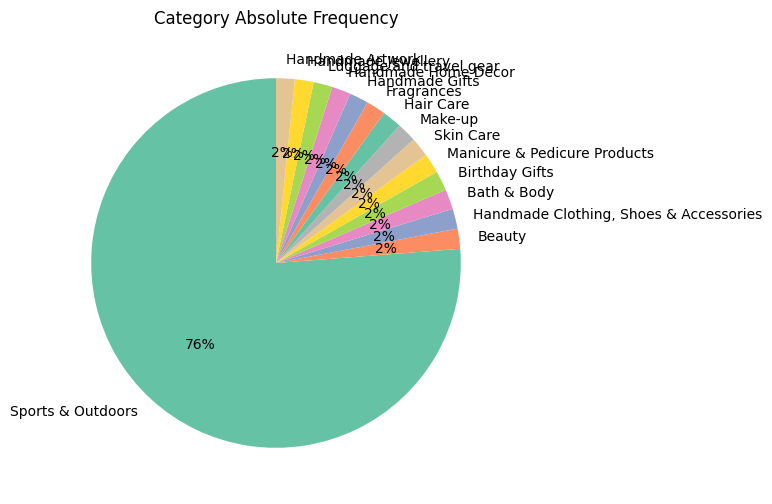

In [78]:
# Generate a bar chart for category columns
def cat_viz(fre, col_):
    '''This function generate a bar and pie chart for category columns and save it 
        in the plot folder'''

    # Formating column names for visualization    
    formatted_title = col_.title()  
    
    # Bar plot

    fig_bar, ax_bar = plt.subplots(figsize=(15, 6))

    sns.barplot(x=col_,y='absolute_frequency',data=fre.head(30),palette='viridis', ax=ax_bar)

    ax_bar.set_title(f'{formatted_title} Absolute Frequency')
    ax_bar.set_xlabel(formatted_title)
    ax_bar.set_ylabel('Absolute Frequency')
    for label in ax_bar.get_xticklabels():
        label.set_ha('right')
    ax_bar.tick_params(axis='x', rotation=45)

    plt.show()

    # Pie plot

    # Generating the freuqncy tables
       
    fig_pie, ax_pie = plt.subplots(figsize=(15, 6))
    
    fre["absolute_frequency"].head(15).plot.pie(autopct='%1.0f%%' ,startangle=90, colors=sns.color_palette('Set2'), ax=ax_pie)
    
    ax_pie.set_title(f'{formatted_title} Absolute Frequency')
    ax_pie.set_ylabel('')

    plt.show()

    

cat_viz(freq_table, "category")

In [79]:
# Sports & Outdoors category dominate

# Part 2: Delving into Product Pricing

### Measures of Centrality

In [111]:
mean_ = cash_requests['price'].mean()
median_ = cash_requests['price'].median()
mode_ = cash_requests['price'].mode().iloc[0]

print(f"Mean: {mean_:.2f}")
print(f"Median: {median_:.2f}")
print(f"Mode: {mode_:.2f}")

print(f"The average price point of products listed is: {mean_}.")

if mean_ < mode_:
    print(f"The mean ({mean_:.2f}) is lower that the most common pricer point ({mode_:.2f})")
else:
    print(f"The mean ({mean_:.2f}) is higher that the most common pricer point ({mode_:.2f})")

Mean: 89.24
Median: 19.09
Mode: 9.99
The average price point of products listed is: 89.24380943923663.
The mean (89.24) is higher that the most common pricer point (9.99)


### Measures of Dispersion

In [88]:
variance_ = cash_requests['price'].var()
std_ = cash_requests['price'].std()
range_ = cash_requests['price'].max() - cash_requests['price'].min()
iqr_ = cash_requests['price'].quantile(0.75) - cash_requests['price'].quantile(0.25)

print(f"Variance: {variance_:.2f}")
print(f"Standard Deviation: {std_:.2f}")
print(f"Range: {range_:.2f}")
print(f"Interquartile Range (IQR): {iqr_:.2f}")

Variance: 119445.49
Standard Deviation: 345.61
Range: 100000.00
Interquartile Range (IQR): 36.00


In [93]:
# There is a big variation in product prices that can be see for a large range and high standard deviation.
# Also the mean is higher than the mode indicating outliers 

### Visualizations

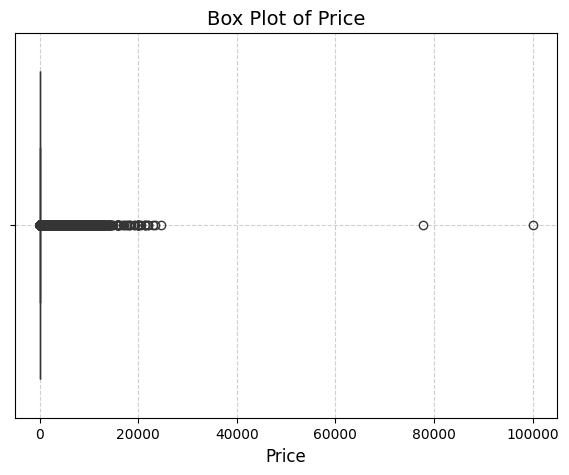

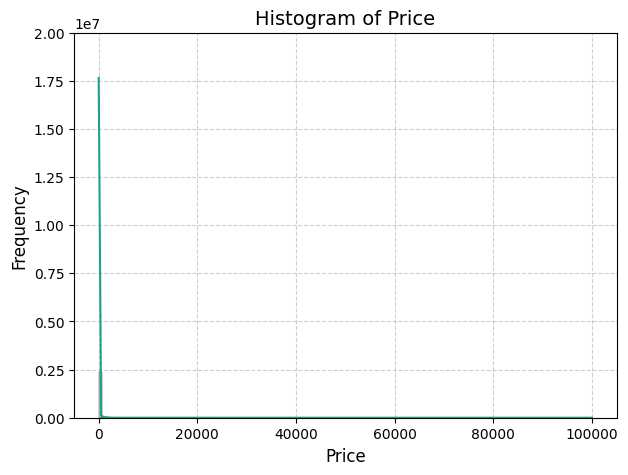

In [108]:
def stat_viz(data_frame, col_):
    '''This function generate a box and histogram chart for numerical columns and save it 
        in the plot folder'''

    # Generate a histo for category columns    

    # Box plot    
    fig_box, ax_box = plt.subplots(figsize=(7, 5))
    sns.boxplot(x=data_frame[col_], palette="viridis", ax= ax_box)
    ax_box.set_title(f'Box Plot of {col_.title()}', fontsize=14)
    ax_box.set_xlabel(col_.title(), fontsize=12)
    ax_box.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Hist
    fig_hist, ax_hist = plt.subplots(figsize=(7, 5))
    sns.histplot(data_frame[col_], kde=True, color=sns.color_palette("viridis")[3], ax=ax_hist, bins=150)
    ax_hist.set_title(f'Histogram of {col_.title()}', fontsize=14)
    ax_hist.set_xlabel(col_.title(), fontsize=12)
    ax_hist.set_ylabel('Frequency', fontsize=12)
    ax_hist.grid(True, linestyle="--", alpha=0.6)
    ax_hist.set_ylim(0, 20000000)
    plt.show()

stat_viz(cash_requests, "price")



In [109]:
# Most products are in a lower price range, however there are products priced significant higher than the rest that create a right spread of the distribution

# Part 3: Unpacking Product Ratings

### Measures of Centrality

In [123]:
mean_ = cash_requests['stars'].mean()
median_ = cash_requests['stars'].median()
mode_ = cash_requests['stars'].mode().iloc[0]

print(f"Mean: {mean_:.2f}")
print(f"Median: {median_}")
print(f"Mode: {mode_}")

print(f"Customer generally rate products with a: {mode_}.")

if mean_ < median_:
    print(f"A few low ratings may be pulling the average down")
else:
    print(f"Many low ratings but some very high ones pulling the mean up")

Mean: 2.15
Median: 0.0
Mode: 0.0
Customer generally rate products with a: 0.0.
Many low ratings but some very high ones pulling the mean up


### Measures of Dispersion

In [120]:
variance_ = cash_requests['stars'].var()
std_ = cash_requests['stars'].std()
range_ = cash_requests['stars'].max() - cash_requests['stars'].min()
iqr_ = cash_requests['stars'].quantile(0.75) - cash_requests['stars'].quantile(0.25)

print(f"Variance: {variance_:.2f}")
print(f"Standard Deviation: {std_:.2f}")
print(f"Range: {range_:.2f}")
print(f"Interquartile Range (IQR): {iqr_:.2f}")

Variance: 4.82
Standard Deviation: 2.19
Range: 5.00
Interquartile Range (IQR): 4.40


In [121]:
# A high standard deviation suggest that ratings are widely spread. 
# The maximum possible range (5.00) suggests that customers have given both the lowest and highest ratings. 
# A large IQR means ratings are not tightly clustered around the median, suggesting customers have diverse opinions.

### Measures of Dispersion

In [124]:
from scipy.stats import skew, kurtosis

rating_skewness = skew(cash_requests['stars'])
rating_kurtosis = kurtosis(cash_requests['stars'])

print(f"Skewness: {rating_skewness:.2f}")
print(f"Kurtosis: {rating_kurtosis:.2f}")


Skewness: 0.08
Kurtosis: -1.93


In [ ]:
# Positive Skewness: the distribution leans towards lower ratings, meaning there are more low ratings,
#  but some high ratings pull the mean up
# Negative Kurtosis, the data is flatter, ratings are more evenly spread across the range

### Visualizations

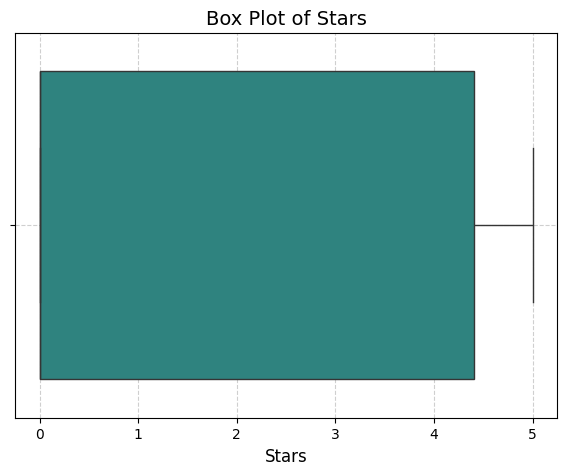

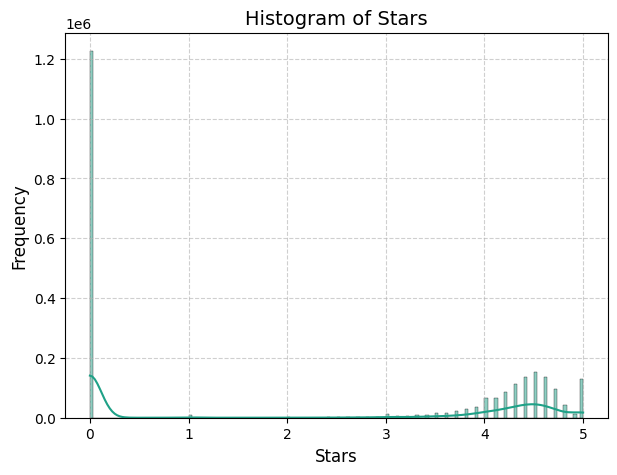

In [127]:
def stat_viz(data_frame, col_):
    '''This function generate a box and histogram chart for numerical columns and save it 
        in the plot folder'''

    # Generate a histo for category columns    

    # Box plot    
    fig_box, ax_box = plt.subplots(figsize=(7, 5))
    sns.boxplot(x=data_frame[col_], palette="viridis", ax= ax_box)
    ax_box.set_title(f'Box Plot of {col_.title()}', fontsize=14)
    ax_box.set_xlabel(col_.title(), fontsize=12)
    ax_box.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Hist
    fig_hist, ax_hist = plt.subplots(figsize=(7, 5))
    sns.histplot(data_frame[col_], kde=True, color=sns.color_palette("viridis")[3], ax=ax_hist, bins=150)
    ax_hist.set_title(f'Histogram of {col_.title()}', fontsize=14)
    ax_hist.set_xlabel(col_.title(), fontsize=12)
    ax_hist.set_ylabel('Frequency', fontsize=12)
    ax_hist.grid(True, linestyle="--", alpha=0.6)
    #ax_hist.set_ylim(0, 20000000)
    plt.show()

stat_viz(cash_requests, "stars")


In [128]:
# There is a dispertion of ratings from 0 to 4, with a few ouliers around 5
# Most products have a raiting of 0, with a few products with high ratings pulling the mean up